In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import bs_ds as bs
bs.big_pandas()

from functions_combined_BEST import ihelp,get_day_window_size_from_freq,custom_BH_freq, set_timeindex_freq,check_null_times
from functions_combined_BEST import plot_time_series, load_stock_price_series

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.max_info_columns=500
display.precision=4
For detailed help as well as source code, use `ihelp(function)`


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
skip=True

In [3]:
#################### TIMEINDEX FUNCTIONS #####################
if skip==False:
    def get_day_window_size_from_freq(dataset):#, freq='CBH'):

        if dataset.index.freq == custom_BH_freq():
            return 7

        if dataset.index.freq=='T':
            day_window_size = 60*24
        elif dataset.index.freq=='BH':
            day_window_size = 8
    #     elif dataset.index.freq=='CBH':
    #         day_window_size = 7
        elif dataset.index.freq=='B':
            day_window_size=1
        elif dataset.index.freq=='D':
            day_window_size=1

        else:
            raise Exception('dataset freq=None')

        return day_window_size


    def custom_BH_freq():
        import pandas as pd
        CBH = pd.tseries.offsets.CustomBusinessHour(start='09:30',end='16:30')
        return CBH


    def  set_timeindex_freq(ive_df, col_to_fill=None, freq='CBH',fill_method='ffill',
                            verbose=3): #set_tz=True,

        import pandas as pd
        import numpy as np


        if verbose>1:
            # print(f"{'Index When:':>{10}}\t{'Freq:':>{20}}\t{'Index Start:':>{40}}\t{'Index End:':>{40}}")
            print(f"{'Index When:'}\t{'Freq:'}\t{'Index Start'}\t\t{'Index End:'}")
            print(f"Pre-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


        if freq=='CBH':
            freq=custom_BH_freq()
    #         start_idx = 

        # Change frequency to freq
        ive_df = ive_df.asfreq(freq,)#'min')

        #     # Set timezone
        #     if set_tz==True:
        #         ive_df.tz_localize()
        #         ive_df.index = ive_df.index.tz_convert('America/New_York')

        # Report Success / Details
        if verbose>1:
            print(f"Post-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


        ## FILL AND TRACK TIMEPOINTS WITH MISSING DATA    

        # Helper Function for adding column to track the datapoints that were filled
        def check_null_times(x):
            import numpy as np
            if np.isnan(x):
                return True
            else:
                return False

        ## CREATE A COLUMN TO TRACK ROWS TO BE FILLED
        # If col_to_fill provided, use that column to create/judge ive_df['filled_timebin'] 
        if col_to_fill!=None:
            ive_df['filled_timebin'] = ive_df[col_to_fill].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()

        # if not provided, use all columns and sum results
        elif col_to_fill == None:
            # Prefill fol with 0's
            ive_df['filled_timebin']=0

            # loop through all columns and add results of check_null_times from each loop
        for col in ive_df.columns:
            if ive_df[col].dtypes=='float64':
                #ive_df['filled_timebin'] = ive_df[target_col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
                curr_filled_timebin_col = ive_df[col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any() 

                # add results
                ive_df['filled_timebin'] +=  curr_filled_timebin_col

        ive_df['filled_timebin'] = ive_df['filled_timebin'] >0

        ## FILL IN NULL VALUES
        ive_df.fillna(method=fill_method, inplace=True)

        # Report # filled
        if verbose>0:
            check_fill = ive_df.loc[ive_df['filled_timebin']>0]
            print(f'\nFilled {len(check_fill==True)}# of rows using method {fill_method}')

        # Report any remaning null values
        if verbose>0:
            res = ive_df.isna().sum()
            if res.any():
                print(f'Cols with Nulls:')
                print(res[res>0])
            else:
                print('No Remaining Null Values')   

        # display header
        if verbose>2:
            display(ive_df.head())

        return ive_df


    # Helper Function for adding column to track the datapoints that were filled
    def check_null_times(x):
        import numpy as np
        if np.isnan(x):
            return True
        else:
            return False


    ############### TIMESERIES TESTS AND VISUALS ###############

    def plot_time_series(stocks_df, freq=None, fill_method='ffill',figsize=(12,4)):

        df = stocks_df.copy()
        df.fillna(method=fill_method, inplace=True)
        df.dropna(inplace=True)

        if (df.index.freq==None) & (freq == None):
            xlabels=f'Time'

        elif (df.index.freq==None) & (freq != None):
            df = df.asfreq(freq)
            df.fillna(method=fill_method, inplace=True)
            df.dropna(inplace=True)
            xlabels=f'Time - Frequency = {freq}'

        else:
            xlabels=f'Time - Frequency = {df.index.freq}'

        ylabels="Price"

        raw_plot = df.plot(figsize=figsize)
        raw_plot.set_title('Stock Bid Closing Price ')
        raw_plot.set_ylabel(ylabels)
        raw_plot.set_xlabel(xlabels)


    #################### TIMEINDEX FUNCTIONS #####################



    def  set_timeindex_freq(ive_df, col_to_fill=None, freq='CBH',fill_method='ffill',
                            verbose=3): #set_tz=True,

        import pandas as pd
        import numpy as np


        if verbose>1:
            # print(f"{'Index When:':>{10}}\t{'Freq:':>{20}}\t{'Index Start:':>{40}}\t{'Index End:':>{40}}")
            print(f"{'Index When:'}\t{'Freq:'}\t{'Index Start'}\t\t{'Index End:'}")
            print(f"Pre-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


        if freq=='CBH':
            freq=custom_BH_freq()
    #         start_idx = 

        # Change frequency to freq
        ive_df = ive_df.asfreq(freq,)#'min')

        #     # Set timezone
        #     if set_tz==True:
        #         ive_df.tz_localize()
        #         ive_df.index = ive_df.index.tz_convert('America/New_York')

        # Report Success / Details
        if verbose>1:
            print(f"Post-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


        ## FILL AND TRACK TIMEPOINTS WITH MISSING DATA    

        # Helper Function for adding column to track the datapoints that were filled
        def check_null_times(x):
            import numpy as np
            if np.isnan(x):
                return True
            else:
                return False

        ## CREATE A COLUMN TO TRACK ROWS TO BE FILLED
        # If col_to_fill provided, use that column to create/judge ive_df['filled_timebin'] 
        if col_to_fill!=None:
            ive_df['filled_timebin'] = ive_df[col_to_fill].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()

        # if not provided, use all columns and sum results
        elif col_to_fill == None:
            # Prefill fol with 0's
            ive_df['filled_timebin']=0

            # loop through all columns and add results of check_null_times from each loop
        for col in ive_df.columns:
            if ive_df[col].dtypes=='float64':
                #ive_df['filled_timebin'] = ive_df[target_col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
                curr_filled_timebin_col = ive_df[col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any() 

                # add results
                ive_df['filled_timebin'] +=  curr_filled_timebin_col

        ive_df['filled_timebin'] = ive_df['filled_timebin'] >0

        ## FILL IN NULL VALUES
        ive_df.fillna(method=fill_method, inplace=True)

        # Report # filled
        if verbose>0:
            check_fill = ive_df.loc[ive_df['filled_timebin']>0]
            print(f'\nFilled {len(check_fill==True)}# of rows using method {fill_method}')

        # Report any remaning null values
        if verbose>0:
            res = ive_df.isna().sum()
            if res.any():
                print(f'Cols with Nulls:')
                print(res[res>0])
            else:
                print('No Remaining Null Values')   

        # display header
        if verbose>2:
            display(ive_df.head())

        return ive_df


    # Helper Function for adding column to track the datapoints that were filled
    def check_null_times(x):
        import numpy as np
        if np.isnan(x):
            return True
        else:
            return False

# LOADING STOCK DATA 

2017-01-23 09:30:00    96.23
2017-01-23 09:31:00    96.19
2017-01-23 09:32:00    96.24
2017-01-23 09:33:00    96.30
2017-01-23 09:34:00    96.27
Name: stock_price, dtype: float64

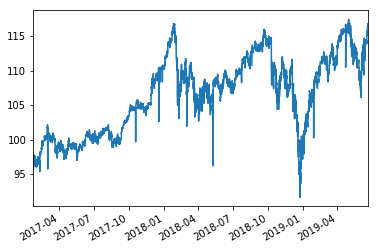

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

# skip=True

if skip==False:
    stock_df = pd.read_csv('data/stock_df_with_tech_indicators_CBH_index.csv')#, index_col=0, parse_dates=True)
    stock_df['date'] = pd.to_datetime(stock_df['Unnamed: 0'])
    stock_df.drop('Unnamed: 0',axis=1, inplace=True)
    stock_df.set_index('date',inplace=True, drop=False)
    # stock_df = stock_df.asfreq(custom_BH_freq())
    print(stock_df.index.freq)
    display(stock_df.head())
    
    def load_stock_price_series(filename='IVE_bidask1min.txt', 
                                   folderpath='data/',
                                   start_index = '2017-01-23', freq='T'):
        import pandas as pd

        # Load in the text file and set headers
        fullfilename= folderpath+filename
        headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
        stock_df = pd.read_csv(fullfilename, names=headers,parse_dates=True,usecols=['Date','Time','BidClose'])

        # Create datetime index
        date_time_index = stock_df['Date']+' '+stock_df['Time']
        date_time_index = pd.to_datetime(date_time_index)
        stock_df.index=date_time_index

        # Select only the days after start_index
        stock_df = stock_df[start_index:]

        stock_price = stock_df['BidClose'].rename('stock_price')
        stock_price[stock_price==0] = np.nan

        return stock_price

stock_price = load_stock_price_series()
display(stock_price.head())

stock_price.plot()

### SELECTING A SUBSET OF STOCK_DF COLUMNS

In [5]:
if skip==False:
    stock_df = set_timeindex_freq(stock_df,verbose=0)
    # full_df = stock_df.copy()
    stock_df = stock_df.iloc[:,10:]

    # DIsply input stock data
    display(stock_df.head().style.set_caption('Raw Data'))
    # plot_time_series(stock_df['price'])
    stock_df.index

### ADDING A DELTA STOCK PRICE COLUMNS

```python
# make new dataframe starting with date and content
df = stock_df.copy() #'content_stopped',

# create a series with all hours covering entire twitter_df
time_index_hour_bins = pd.date_range(start = stock_df.index[0].floor('H'), end = stock_df.index[-1].ceil('H'), freq='H')#.to_period()

# bin the twitter_df.index by the new time_index_hour_bins
df['time_index_by_hour'] = pd.cut(stock_df['date'], time_index_hour_bins)

# extract JUST the hour_of_day as a feature
df['hour_of_day'] = df['date'].apply(lambda x: x.hour).apply(lambda x: dt.time(x))
df.drop('date',axis=1,inplace=True)
df.head()
```

# LOADING IN TWITTER DATA

In [6]:
from functions_combined_BEST import ihelp, load_twitter_df, df_column_report, make_half_hour_range
ihelp(ihelp)

------------------------------------------------------------------------------------------------------------------------
--------- 	HELP:	 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Help on function ihelp in module functions_combined_BEST:

ihelp(any_function, show_help=True, show_code=True, get_source=True)
    Call on any module or functon to display:
    - help(any_function)
    - source_df = inspect.getsource(any_function)
    inspect.get)

------------------------------------------------------------------------------------------------------------------------
--------- 	SOURCE:	 ------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
def ihelp(any_function, show_

In [7]:
if skip==False:
    import inspect
    def ihelp(any_function, show_help=True, show_code=True, get_source=True): 
        """Call on any module or functon to display:
        - help(any_function)
        - source_df = inspect.getsource(any_function)
        inspect.get)"""
        import inspect
        import pprint as pp
        if show_help:

            print("---"*40)
            print("---"*3,'\tHELP:\t',"---"*30)
            print("---"*40)
            help(any_function)
    #         print('\n\n',"---"*20,'\n')

        if show_code or get_source:

            import inspect
            source_DF = inspect.getsource(any_function)
            print("---"*40)
            print("---"*3,'\tSOURCE:\t',"---"*30)
            print("---"*40)
            print(source_DF)    


    #***#
    # del(twitter_df)

    def load_twitter_df(overwrite=True,set_index='time_index',verbose=2,replace_na=''):

        try: twitter_df
        except NameError: twitter_df = None
        if twitter_df is not None:
            print('twitter_df already exists.')
            if overwrite==True:
                print('Overwrite=True. deleting original...')
                del(twitter_df)

        if twitter_df is None:
            print('loading twitter_df')

            twitter_df = pd.read_csv('data/trump_twitter_archive_df.csv', encoding='utf-8', parse_dates=True)
            twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

            twitter_df['date']  = pd.to_datetime(twitter_df['date'])
            twitter_df['time_index'] = twitter_df['date'].copy()
            twitter_df.set_index(set_index,inplace=True,drop=True)


            # Fill in missing values before merging with stock data
            twitter_df.fillna(replace_na, inplace=True)
            twitter_df.sort_index(ascending=True, inplace=True)

            # RECASTING A COUPLE COLUMNS
            twitter_df['is_retweet'] = twitter_df['is_retweet'].astype('bool')
            twitter_df['id_str'] = twitter_df['id_str'].astype('str')
            twitter_df['sentiment_class'] = twitter_df['sentiment_class'].astype('category')

    #         twitter_df.reset_index(inplace=True)
            # Check header and daterange of index
        if verbose>0:
            display(twitter_df.head(2))
            print(twitter_df.index[[0,-1]])
        return twitter_df


    # twitter_df = load_twitter_df()

    #***#
    # DISPLAYING PLAN FOR DEALING WITH DATA
    # df_dtypes =pd.DataFrame({'type':twitter_df.dtypes})#,'null':twitter_df.isna().sum(),'count':twitter_df.count()})
    def df_column_report(twitter_df, sort_column=None, ascending=True, interactive=True):
        from ipywidgets import interact
        df_dtypes=pd.DataFrame()
        df_dtypes = pd.DataFrame({'Column #': range(len(twitter_df.columns)),'Column Name':twitter_df.columns,
                                  'Data Types':twitter_df.dtypes.astype('str')}).set_index('Column Name') #.set_index('Column Name')

        decision_map = {'object':'join','int64':'sum','bool':'to_list()?','float64':'drop and recalculate'}

        df_dtypes['action'] = df_dtypes['Data Types'].map(decision_map)#column_list
    #     df_dtypes.style.set_caption('DF Columns, Dtypes, and Course of Action')

        if sort_column is not None:
            df_dtypes.sort_values(by =sort_column,ascending=ascending, axis=0, inplace=True)
        if interactive==False:
            return df_dtypes
        else: 

            @interact(column= df_dtypes.columns,direction={'ascending':True,'descending':False})
            def sort_df(column, direction):
                return df_dtypes.sort_values(by=column,axis=0,ascending=direction)

    # df_dtypes =  df_column_report(twitter_df, sort_column=['Data Types','Column #'])
    # df_dtypes
    # res_df = df_column_report(twitter_df)

    #***#a
    # twitter_df = load_twitter_df()

    def make_half_hour_range(twitter_df):

        # Get timebin before the first timestamp that starts at 30m into the hour
        ofst_30m_early=pd.offsets.Minute(-30)
        start_idx = ofst_30m_early(twitter_df['date'].iloc[0].floor('H'))

        # Get timbin after last timestamp that starts 30m into the hour.
        ofst_30m_late =pd.offsets.Minute(30)
        end_idx= ofst_30m_late(twitter_df['date'].iloc[-1].ceil('H'))


        # Make time bins using the above start and end points 
        half_hour_range = pd.date_range(start =start_idx, end = end_idx, freq='30T')#.to_period()
        half_hour_intervals = pd.interval_range(start=start_idx, end=end_idx,freq='30T',name='half_hour_bins',closed='left')

        return half_hour_intervals

# How to merge stock-market-business hours tweets?
- use `custom_BH_freq` to create a new column that attempts to re-cast the index as this frequency.
    - separate the index off first to another column/dataframe.
    - create a second column that rounds/floors/ceils the timestamp values to the correct business hour
    - **NOTE**: -filling? revisit
    
- Fundamental question: how do I want to determine which stock timebin to evaluate effect of Trump tweet?
    - time series analysis would want the tweet to be in the hour PRIOR to the timepoint to be judged.
- **SO how to best accomplish this?**
    - if do `twitter_df['date'].floor(H), then any tweets from within an hour would be classified as that hour's timebin,
        - if he tweeted at 12:55, that would be considered 12 pm, so using 1 pm as the +1 hour timebin is only really 5 MINS!
        - What if add +1hour to the `date` column's timestamps, then use `.round('H')`
            - **This would probably be the best way to go about it!**
            
**TO DO:**
- [ ] Add +1 hour to twitter_df['date'], then use .round('H')

- **SIMPLER APPROACH: Write function to concatenate rows** (07/04/19)
    - use new_df = df.resample('H').apply(my_func) 
         (or can I do 30mins instead of 'H'?)
         
## HOW TO INSTRUCTIONS FOR FUNCTIONS BELOW

```python 

# #***#  
twitter_df = load_twitter_df()

half_hour_intervals = make_half_hour_range(twitter_df)

twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df, half_hour_intervals)

group_indices = twitter_df.groupby('int_bins').groups
group_indices = [(k,v) for k,v in group_indices.items()]


#***#
new_col_order = ['date','left_edge','content_raw','content_stopped','tokens_stopped',
                  'retweet_count','favorite_count','case_ratio','sentiment_scores','compound_score','int_bins']

twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices, new_col_order=new_col_order)
# twitter_grouped.head(2)

twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
twitter_grouped.set_index('time_bin',drop=True, inplace=True)
twitter_grouped.head(2)
```

### List of Actions by Columns Types

- string/object columns (twitter_df.select_dtypes('object')

In [8]:
# # TAKING A SMALLER TWITTER_DF 
# twitter_df = twitter_df.iloc[:1000,:]
# display(twitter_df.head())
# type_list = twitter_df.dtypes
# # display(type_list)
# # display(twitter_df.index)
# # twitter_df.set_index('time_index',inplace=True, verify_integrity=True)
# # twitter_df.duplicated

### Get timebin before the first timestamp that starts at 30m into the hour


In [9]:
# twitter_df.columns

### def cut_df_by_intervals_to_number_code, concat_df_group

In [10]:
from functions_combined_BEST import int_to_ts, bin_df_by_date_intervals, concatenate_group_data, collapse_df_by_group_indices


In [11]:
if skip==False:
    #***#
    def int_to_ts(int_list, as_datetime=False, as_str=True):
        """Accepts one Panda's interval and returns the left and right ends as either strings or Timestamps."""
        if as_datetime & as_str:
            raise Exception('Only one of `as_datetime`, or `as_str` can be True.')

        left_edges =[]
        right_edges= []

        for interval in int_list:
            int_str = interval.__str__()[1:-1]
            left,right = int_str.split(',')
            left_edges.append(left)
            right_edges.append(right)


        if as_str:
            return left_edges, right_edges

        elif as_datetime:
            left = pd.to_datetime(left)
            right = pd.to_datetime(right)
            return left,right


    # Step 1:     
    def bin_df_by_date_intervals(test_df,half_hour_intervals,column='date'):
        """"""
        # Cut The Date column into interval bins, 
        cut_date = pd.cut(test_df[column], bins=half_hour_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
        test_df['int_times'] = cut_date    

        # convert to str to be used as group names/codes
        unique_bins = cut_date.astype('str').unique()
        num_code = list(range(len(unique_bins)))

        # Dictioanry of number codes to be used for interval groups
        bin_codes = dict(zip(num_code,unique_bins))#.astype('str')


        # Mapper dictionary to convert intervals into number codes
        bin_codes_mapper = {v:k for k,v in bin_codes.items()}


        # Add column to the dataframe, then map integer code onto it
        test_df['int_bins'] = test_df['int_times'].astype('str').map(bin_codes_mapper)


        # Get the left edge of the bins to use later as index (after grouped)
        left_out, _ =int_to_ts(test_df['int_times'])#.apply(lambda x: int_to_ts(x))    
        test_df['left_edge'] = pd.to_datetime(left_out)

        # bin codes to labels 
        bin_codes = [(k,v) for k,v in bin_codes.items()]

        return test_df, bin_codes


    def concatenate_group_data(group_df_or_series):
        """Accepts a series or dataframe from a groupby.get_group() loop.
        Adds TweetFreq column for # of rows concatenate. If input is series, 
        TweetFreq=1 and series is returned."""

        import pandas as pd
        from pandas.api import types as tp

        if isinstance(group_df_or_series, pd.Series):

            group_data = group_df_or_series

    #         group_data.index = group_df_or_series.index
            group_data['TweetFreq'] = 1

            return group_data

        # if the group is a dataframe:
        elif isinstance(group_df_or_series, pd.DataFrame):

            df = group_df_or_series

            # create an output series to collect combined data
            group_data = pd.Series(index=df.columns)
            group_data['TweetFreq'] = df.shape[0]


            for col in df.columns:

                combined=[]
                col_data = []

                col_data = df[col]
                combined=col_data.values

                group_data[col] = combined

        return group_data


    #***#
    def collapse_df_by_group_indices(twitter_df,group_indices, new_col_order=None):
        """Loops through the group_indices provided to concatenate each group into
        a single row and combine into one dataframe with the ______ as the index"""


        # Create a Panel to temporarily hold the group series and dataframes
        # group_dict_to_df = {}
        # create a dataframe with same columns as twitter_df, and index=group ids from twitter_groups
        group_df_index = [x[0] for x in group_indices]


        twitter_grouped = pd.DataFrame(columns=twitter_df.columns, index=group_df_index)
        twitter_grouped['TweetFreq'] =0

        for (idx,group_members) in group_indices:

            group_df = twitter_df.loc[group_members]

            combined_series = concatenate_group_data(group_df)

    #         twitter_grouped.loc[idx,:] = combined_series
            twitter_grouped.loc[idx] = combined_series#.values

        if new_col_order==None:
            return twitter_grouped

        else:
            df_out = twitter_grouped[new_col_order].copy()
            df_out.index = group_df_index#twitter_grouped.index
            return df_out


### Now that twitter df has int_bins, use them for groupby and concatenation

In [12]:
# inspect.getsourcelines(load_twitter_df)
# twitter_grouped.head()

In [13]:
# ### TROUBLESHOOTING CODE BELOW
# twitter_df = load_twitter_df()

# half_hour_intervals = make_half_hour_range(twitter_df)

# cut_date = pd.cut(twitter_df['date'], bins=half_hour_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
# twitter_df['int_times'] =cut_date
# # display(twitter_df.head())


# # convert to str to be used as group names/codes
# unique_bins = cut_date.astype('str').unique()
# num_code = list(range(len(unique_bins)))

# # Dictioanry of number codes to be used for interval groups
# bin_codes = dict(zip(num_code,unique_bins))#.astype('str')


# # Mapper dictionary to convert intervals into number codes
# bin_codes_mapper = {v:k for k,v in bin_codes.items()}


# # Add column to the dataframe, then map integer code onto it
# twitter_df['int_bins'] = twitter_df['int_times'].astype('str').map(bin_codes_mapper)
# twitter_df.head()

# # Get the left edge of the bins to use later as index (after grouped)
# left_out, _ =int_to_ts(twitter_df['int_times'])#.apply(lambda x: int_to_ts(x))    
# twitter_df['left_edge'] = pd.to_datetime(left_out)

# # bin codes to labels 
# bin_codes = [(k,v) for k,v in bin_codes.items()]


# group_indices = twitter_df.groupby('int_bins').groups
# group_indices = [(k,v) for k,v in group_indices.items()]


# #***#
# new_col_order = ['date','left_edge','content_raw','content_stopped','tokens_stopped',
#                   'retweet_count','favorite_count','case_ratio','sentiment_scores','compound_score','int_bins']

# twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices, new_col_order=new_col_order)

# twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
# twitter_grouped.set_index('time_bin',drop=True, inplace=True)

In [14]:
if skip==False:
    # #***#  
    twitter_df = load_twitter_df()

    half_hour_intervals = make_half_hour_range(twitter_df)

    twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df, half_hour_intervals)

    group_indices = twitter_df.groupby('int_bins').groups
    group_indices = [(k,v) for k,v in group_indices.items()]


    #***#
    new_col_order = ['date','left_edge','content_raw','content_stopped','tokens_stopped',
                      'retweet_count','favorite_count','case_ratio','sentiment_scores','compound_score','int_bins']

    twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices, new_col_order=new_col_order)
    # twitter_grouped.head(2)

    twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
    twitter_grouped.set_index('time_bin',drop=True, inplace=True)
    twitter_grouped.head(2)

In [15]:
# pause

### INTERACTIVE PLOT TIME SERIES

- Make a verison of plot_time_series using some version of interact to be able to ADJUST THE TIME AXIS

- https://github.com/bloomberg/bqplot/issues/712

In [16]:
if skip==False:
    # Make a Layout with the range slider and labels as two different boxes, one on top of the other

    start_date = stock_df.index[0]
    end_date  = stock_df.index[-1]

    def make_date_range_slider(start_date,end_date,freq='D'):

        from ipywidgets import interact, interactive, interaction, Label, Box, Layout
        import ipywidgets as iw
        from datetime import datetime

        # specify the date range from user input
        dates = pd.date_range(start_date, end_date,freq=freq)

        # specify formatting based on frequency code
        date_format_lib={'D':'%m/%d/%Y','H':'%m/%d/%Y: %T'}
        freq_format = date_format_lib[freq]


        # creat options list and index for SelectionRangeSlider
        options = [(date.strftime(date_format_lib[freq]),date) for date in dates]
        index = (0, len(options)-1)

        #     # Create out function to display outputs (not needed?)
        #     out = iw.Output(layout={'border': '1px solid black'})
        #     #     @out.capture()

        # Instantiate the date_range_slider
        date_range_slider = iw.SelectionRangeSlider(
            options=options, index=index, description = 'Date Range',
            orientation = 'horizontal',layout={'width':'500px','grid_area':'main'},#layout=Layout(grid_area='main'),
            readout=True)

        # Save the labels for the date_range_slider as separate items
        date_list = [date_range_slider.label[0], date_range_slider.label[-1]]
        date_label = iw.Label(f'{date_list[0]} -- {date_list[1]}',
                             layout=Layout(grid_area='header'))

        def updateXAxis(change):
            #Update X-axis min/max value here
            if change['type'] == 'change' and change['name'] == 'value':
                x_start = change['new'][0]
                x_end = change['new'][1]
        date_range_slider.observe(updateXAxis)
    #             x_sc.min = change['new'][0]
    #             x_sc.max = change['new'][1]

    #     source1, target1 = date_range_slider, date_label
    #     dl = iw.dlink((soruce1,'label'),(target1,'value'))

    #     ## ADJUST LABEL OUTPUT TO MATCH SLIDER
    #     output2 = date_label#widgets.Output()
    #     def on_value_change(change):
    #         with output2:
    #             print(change['new'])
    #     header  = date_range_slider
    #     main    = date_label      

    #     slider_items=[date_range_slider, date_label]
    #     output = iw.GridBox(children=[date_range_slider,date_label],
    #                        layout=Layout(
    #                        grid_template_rows='auto auto',
    #                        grid_template_columns='auto auto',
    #                        grid_template_areas='''
    #                        "header header"
    #                        "main main"
    #                        '''))# display='flex','flex_flow'
        return date_range_slider

    make_date_range_slider(start_date, end_date,'D')

In [17]:
# # Instantiate the date_range_slider
# date_range_slider = iw.SelectionRangeSlider(
#     options=options, index=index, description = 'Date Range',
#     orientation = 'horizontal',layout={'width':'500px'},readout=False)

# # Save the labels for the date_range_slider as separate items
# # date_list = [date_range_slider.label[0], date_range_slider.label[-1]]
# date_label1 = iw.Label(date_range_slider.label[0])
# date_label2 = iw.Label(date_range_slider.label[-1])
# source_1, target_1 = date_range_slider, iw.Label

# def tf_label(label):
#     return str(label[0])
# dl1 = iw.dlink((source_1,'label',lambda x: tf_label(x)),(target_1,'value'))#,lambda x: str(x)))

## SAVE AND LOAD GROUPED DATA

In [18]:
# twitter_grouped.to_csv('twitter_data_grouped.csv')

In [19]:
# twitter_df.head(3)

In [20]:
# twitter_grouped.loc['02-21-2017']

In [21]:
# stock_df.loc['02-21-2017'].head()

In [22]:
# twitter_grouped.loc['02-21-2017':].index

In [23]:
# stock_prices = stock_df['price']
# stock_prices.index

In [24]:
# CBH = custom_BH_freq()

# grouped_resampled = twitter_grouped.loc['02-21-2017':].asfreq(CBH)
# stock_resampled = stock_df.loc['02-21-2017':].asfreq(CBH)
# # grouped_resampled = grouped_resampled.loc[stock_df.index[0]:stock_df.index[-1]]

In [25]:
# display_range = stock_resampled.index
# display_range

In [26]:
# grouped_resampled.head()

In [27]:
# grouped_twitter_valid = grouped_resampled['content_raw'].notnull().index
# grouped_twitter_valid

In [28]:
# # display_range = grouped_resampled.index
# from ipywidgets import interact
# display_range = grouped_resampled['content_raw'].notnull().index


# @interact(date=display_range, num_items=range(3,10))
# def display_date(date=['02-22-2017'], num_items=10, filter_null=True):
    
#     display(grouped_resampled.loc[date:].head(num_items).style.set_caption('Twitter'))
#     display(stock_resampled.loc[date:].head(num_items).style.set_caption('S&P500'))

In [29]:
# grouped_resampled['join_date'] = grouped_resampled.index
# stock_df['join_date'] =  stock_df.index

# print(grouped_resampled.join_date)
# print(stock_df.join_date)

# # print(len(grouped_resampled),len(twitter_grouped))

# # compare_indices = [True for i in grouped_resampled.index if i in stock_df.index]
# # np.sum(compare_indices==False)

# BOOKMARK _ NEW APPROACH. 

- use `load_stock_price_series()` to get a SERIES of just stock prices (not yet on official Freq)
- use twitter_df data (not grouped)
- use new function to take each tweet's timestamp, then find the corresponding stock price X amount of time later (then difference)

### GOAL NOW:

- [ ] write a function that will tweet timestamps and find the next corresponding stock price to use as labels
- [ ] **add a rolling forward offset that would move off hours timestamps to 09:30 am next day**

`match_stock_price_to_tweets`

In [30]:
# grouped_resampled.index, stock_df.index

In [31]:
# grouped_resampled = grouped_resampled.join(stock_df['price'],how='right')#,left_index=True, right_index=True)
# display(grouped_resampled.head())
# display(grouped_resampled.tail())

In [32]:
# ## LOAD STOCK PRICE SERIES
# # Make stock price reference series with minute resolution
# stock_price = load_stock_price_series()
# print(f'Null Values when Freq={stock_price.index.freq}:\t{stock_price.isna().sum()}')

# # Change to Minute-Data
# stock_price = stock_price.asfreq('T')
# print(f'Null Values when Freq={stock_price.index.freq}:\t{stock_price.isna().sum()}')

# stock_price.index

In [33]:
# # Dropna in stock_Series?
# # stock_price.fillna(-999, inplace=True)
# stock_price.dropna(inplace=True)
# stock_price.index
# # stock_price.loc[stock_price > 0].plot()
# # plt.figure()
# # stock_price.loc[stock_price < 0].plot()

In [34]:
# LOAD IN STOCK PRICE SERIES
# try 
# display(stock_price.head())
# stock_price.index

In [35]:
# test_per = twitter_periods.index[0]
# test_per

# test_index = twitter_df.index[0]
# test_index

# # get_month_day_year(test_per), get_month_day_year(test_index)
# test_index.second

# twitter_df['B_day']= [str(x.strftime('%m-%d-%Y')) for x in twitter_periods['time_index'].values]

# twitter_df['B_day'][0],twitter_df['day'][0]

### CURRENT:
code as of morning of 07/08
```python

# CREATE COLUMNS TO GET NEXT BUSINESS DAY
def get_month_day_year(x):
    x_date =dt.date(month=x.month, day=x.day, year=x.year)
    return x_date.strftime('%m-%d-%Y')

def get_time_of_day(x):
    x_time = dt.time(hour= x.hour, minute=x.minute, second=x.second)
    return x_time.strftime('%T')


# Separate day and time for twitter timestamp 
twitter_df['day'] = twitter_df['date'].apply(lambda x: get_month_day_year(x))
# twitter_df['day'] =  pd.to_datetime(twitter_df['day'])

twitter_df['time'] =  twitter_df['date'].apply(lambda x: get_time_of_day(x))

# Get the corresponding next business day for each row
twitter_periods = twitter_df.to_period('B')
twitter_periods.reset_index(inplace=True)

# def get_bday_btime(x):
#     for r
twitter_df['B_day']= [str(x.strftime('%m-%d-%Y')) for x in twitter_periods['time_index'].values]
twitter_df['B_shifted']=np.where(twitter_df['day']== twitter_df['B_day'],False,True);
twitter_df['B_time'] = np.where(twitter_df['day']== twitter_df['B_day'],twitter_df['time'],dt.time(hour=9, minute=30))#:30:00');
twitter_df['B_dt_index'] = [ str(twitter_df['B_day'].iloc[x]) +'  '+ str(twitter_df['B_time'].iloc[x])  for x in range(len(twitter_df))]
twitter_df['B_dt_index'] = pd.to_datetime(twitter_df['B_dt_index'])#asfreq('T')
# twitter_df['B_dt_index'] = twitter_df['B_dt_index'].round('T')



twitter_df.head(16)
```

In [36]:
# type(twitter_df['time'][0])

In [37]:
# ts = twitter_df.index[2]
# print(ts)
# ts.strftime('%H:%M')
# ts.round('T')

# FULL WORKFLOW FOR TWITTER-STOCK DATA

In [38]:
from functions_combined_BEST import get_B_day_time_index_shift, reorder_twitter_df_columns, match_stock_price_to_tweets, unpack_match_stocks


### def functions for getting business day info (get_B_day_time_index_shift)

In [39]:
if skip==False:
    def get_B_day_time_index_shift(test_df, verbose=1):

        fmtYMD= '%Y-%m-%d'

        test_df['day']= test_df['date'].dt.strftime('%Y-%m-%d')
        test_df['time'] = test_df['date'].dt.strftime('%T')
        test_df['dayofweek'] = test_df['date'].dt.day_name()

        test_df_to_period = test_df[['date','content']]
        test_df_to_period = test_df_to_period.to_period('B')
        test_df_to_period['B_periods'] = test_df_to_period.index.values
        test_df_to_period['B_day'] = test_df_to_period['B_periods'].apply(lambda x: x.strftime(fmtYMD))



        test_df['B_day'] = test_df_to_period['B_day'].values
        test_df['B_shifted']=np.where(test_df['day']== test_df['B_day'],False,True)
        test_df['B_time'] = np.where(test_df['B_shifted'] == True,'09:30:00', test_df['time'])

        test_df['B_dt_index'] = pd.to_datetime(test_df['B_day'] + ' ' + test_df['B_time']) 

        test_df['time_shift'] = test_df['B_dt_index']-test_df['date'] 

        if verbose > 0:
            test_df.head(20)

        return test_df

    def reorder_twitter_df_columns(twitter_df, order=[]):
        if len(order)==0:
            order=['date','dayofweek','B_dt_index','source','content','content_raw','retweet_count','favorite_count','sentiment_scores','time_shift']
        twitter_df_out = twitter_df[order]
        twitter_df_out.index = twitter_df.index
        return twitter_df_out


    def match_stock_price_to_tweets(tweet_timestamp,time_after_tweet= 30,time_freq ='T',stock_price=[]):#stock_price_index=stock_date_data):

        import pandas as pd
        from datetime import datetime as dt
        # output={'pre_tweet_price': price_at_tweet,'post_tweet_price':price_after_tweet,'delta_price':delta_price, 'delta_time':delta_time}
        output={}
        # convert tweet timestamp to minute accuracy
        ts=[]
        ts = pd.to_datetime(tweet_timestamp).round(time_freq)

        BH = pd.tseries.offsets.BusinessHour(start='09:30',end='16:30')
        BD = pd.tseries.offsets.BusinessDay()


        # checking if time is within stock_date_data
    #     def roll_B_day_forward(ts):

        if ts not in stock_price.index:
            ts = BH.rollforward(ts)        

            if ts not in stock_price.index:
                return np.nan#"ts2_not_in_index"

        # Get price at tweet time
        price_at_tweet = stock_price.loc[ts]

        if np.isnan(price_at_tweet):
            output['pre_tweet_price'] = np.nan
        else: 
            output['pre_tweet_price'] = price_at_tweet


        # Use timedelta to get desired timepoint following tweet
        hour_freqs = 'BH','H','CBH'
        day_freqs = 'B','D'

        if time_freq=='T':
            ofst=pd.offsets.Minute(time_after_tweet)

        elif time_freq in hour_freqs:
            ofst=pd.offsets.Hour(time_after_tweet)

        elif time_freq in day_freqs:
            ofst=pd.offsets.Day(time_after_tweet)


        # get timestamp to check post-tweet price
        post_tweet_ts = ofst(ts)


        if post_tweet_ts not in stock_price.index:
    #         post_tweet_ts =BD.rollforward(post_tweet_ts)
            post_tweet_ts = BH.rollforward(post_tweet_ts)

            if post_tweet_ts not in stock_price.index:
                return np.nan


        # Get next available stock price
        price_after_tweet = stock_price.loc[post_tweet_ts]
        if np.isnan(price_after_tweet):
            output['post_tweet_price'] = 'NaN in stock_price'
        else:
            # calculate change in price
            delta_price = price_after_tweet - price_at_tweet
            delta_time = post_tweet_ts - ts
            output['post_tweet_price'] = price_after_tweet
            output['delta_time'] = delta_time
            output['delta_price'] = delta_price

    #         output={'pre_tweet_price': price_at_tweet,'post_tweet_price':price_after_tweet,'delta_price':delta_price, 'delta_time':delta_time}

        return output
    
    def unpack_match_stocks(stock_dict):
        stock_series = pd.Series(stock_dict)
        return stock_series

In [40]:
# ###   APPLYING FULL WORKFLOW WRITTEN ABOVE IN CODE ###
# ## LOAD IN STOCK PRICE
# del stock_price
# try: stock_price
# except NameError: stock_price = None
# if stock_price is  None:    
#     print('loading stock_price')
#     stock_price = load_stock_price_series()
# else:
#     print('using pre-existing stock_price')
        
# # Make sure stock_price is loaded as minute data
# stock_price = stock_price.asfreq('T')
# stock_price.isna().sum()
# # stock_price.dropna(inplace=True)

In [41]:
# stock_price[:10]
# stock_times = stock_price.index.strftime('%T')
# stock_days = stock_price.index.day_name() 

In [42]:
# stock_details = pd.concat([stock_price, pd.Series(stock_times.values), pd.Series(stock_days.values)],axis=1)


### INVESTINGATING STOCK PRICE MISSING DATAA @NOW-ish

In [43]:
# stock_details = pd.DataFrame({'times':stock_times,'days': stock_days})
# stock_details = pd.concat([stock_price.reset_index(),stock_details],axis=1)
# stock_details.set_index('index',inplace=True)
# display(stock_details.head())
# stock_details.plot()

In [44]:
# stock_details.loc[stock_details['stock_price'].isna()].head()

In [45]:
# from pandas_profiling import ProfileReport
# ProfileReport(twitter_df)

# FOR NOW - GOING FORWARD WITH 4000 TWEETS WITH PRICES

In [46]:
from functions_combined_BEST import load_raw_twitter_file, full_twitter_df_processing

In [47]:
#### NOW ALL AS FUNCTIONS BELOW


# ###   APPLYING FULL WORKFLOW WRITTEN ABOVE IN CODE ###
# ## LOAD IN STOCK PRICE
# # del stock_price
# try: stock_price
# except NameError: stock_price = None
# if stock_price is  None:    
#     print('loading stock_price')
#     stock_price = load_stock_price_series()
# else:
#     print('using pre-existing stock_price')
        
# # Make sure stock_price is loaded as minute data
# stock_price = stock_price.asfreq('T')
# stock_price.dropna(inplace=True)

# ## LOAD TWEETS, SELECT THE PROPER DATE RANGE AND COLUMNS
# twitter_df = load_twitter_df(verbose=0)
# twitter_df = twitter_df.loc[stock_price.index[0]:stock_price.index[-1]]
      
      
# twitter_df = twitter_df[['date','source','content','content_raw','retweet_count','favorite_count','sentiment_scores']]
# # twitter_df.head()





# # Get get the business day index to account for tweets during off-hours
# twitter_df = get_B_day_time_index_shift(twitter_df,verbose=1)

# # Reorder Columns to desired order
# twitter_df = reorder_twitter_df_columns(twitter_df,
#                                         order=['date','dayofweek','B_dt_index','B_day','source','content',
#                                                'content_raw','retweet_count','favorite_count',
#                                                'sentiment_scores','time_shift'])


# # Make temporary B_dt_index var in order to round that column to minute-resolution
# B_dt_index = twitter_df[['B_dt_index','B_day']]#.asfreq('T')
# B_dt_index['B_dt_index']= pd.to_datetime(B_dt_index['B_dt_index'])
# B_dt_index['B_dt_index']= B_dt_index['B_dt_index'].dt.round('T')

# # Get stock_prices for each twitter timestamp
# twitter_df['B_dt_minutes'] = B_dt_index['B_dt_index'].copy()
# twitter_df['stock_price_results'] = twitter_df['B_dt_minutes'].apply(lambda x: match_stock_price_to_tweets(x,stock_price=stock_price))
# df_to_add = twitter_df['stock_price_results'].apply(lambda x: unpack_match_stocks(x))

# new_twitter_df = pd.concat([twitter_df,df_to_add], axis=1)


# twitter_df = new_twitter_df.loc[~new_twitter_df['post_tweet_price'].isna()]
# # twitter_df.drop(['0'],axis=1,inplace=True)
# twitter_df['stock_delta_class'] = np.where(twitter_df['delta_price'] > 0,'pos','neg')

# # display(twitter_df.head())
# print(twitter_df.isna().sum())

In [80]:
del twitter_df, stock_price

In [5]:
from functions_combined_BEST import *

In [6]:
##### MAKING ALL OF THE ABOVE STUFF INTO A FUNCTION
# del twitter_df
###   APPLYING FULL WORKFLOW WRITTEN ABOVE IN CODE ###
## LOAD IN STOCK PRICE
def load_twitter_df_stock_price():# del stock_price
    try: stock_price
    except NameError: stock_price = None
    if stock_price is  None:    
        print('loading stock_price')
        stock_price = load_stock_price_series()
    else:
        print('using pre-existing stock_price')

    # Make sure stock_price is loaded as minute data
    stock_price = stock_price.asfreq('T')
    stock_price.dropna(inplace=True)
    stock_price.sort_index(inplace=True)

    ## LOAD TWEETS, SELECT THE PROPER DATE RANGE AND COLUMNS
    # twitter_df = load_twitter_df(verbose=0)
    try: twitter_df
    except NameError: twitter_df=None
    if twitter_df is None:
        print('Loading twitter_df')
        twitter_df= load_raw_twitter_file()
        twitter_df = full_twitter_df_processing(twitter_df,cleaned_tweet_col='clean_content')

    stock_price.sort_index(inplace=True)
    twitter_df.sort_index(inplace=True)
    
    display(twitter_df.head())
    print(stock_price.index[0],stock_price.index[-1])
    print(twitter_df.index[0],twitter_df.index[-1])
    
    return twitter_df, stock_price

twitter_df,stock_price = load_twitter_df_stock_price()

loading stock_price
Loading twitter_df


,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-20 12:31:53,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53,70523,268372,False,822421390125043713,False,False,[],It all begins today! I will see you at 11:00 A...,It all begins today! I will see you at 11:00 A...,[],,[],,begins today see swearing movement continues w...,"[begins, today, see, swearing, movement, conti...",0.3304,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
2017-01-20 17:51:25,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25,20125,109640,False,822501803615014918,False,False,[],Today we are not merely transferring power fro...,Today we are not merely transferring power fro...,[],,[],,today merely transferring power one administra...,"[today, merely, transferring, power, one, admi...",0.0148,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.2144,pos,0.000,0.919,0.081
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,2017-01-20 17:51:58,18362,91143,False,822501939267141634,False,False,[],power from Washington D.C. and giving it back ...,power from Washington D.C. and giving it back ...,[#InaugurationDay],#InaugurationDay,[],,power washington c giving back american people,"[power, washington, c, giving, back, american,...",0.0778,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,pos,0.000,0.844,0.156
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45,42790,180394,False,822502135233384448,False,False,[],What truly matters is not which party controls...,What truly matters is not which party controls...,[],,[],,truly matters party controls government whethe...,"[truly, matters, party, controls, government, ...",0.0086,"{'neg': 0.079, 'neu': 0.776, 'pos': 0.145, 'co...",0.0954,pos,0.079,0.776,0.145
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,2017-01-20 17:53:17,60604,218555,False,822502270503972872,False,False,[],January 20th 2017 will be remembered as the da...,January 20th 2017 will be remembered as the da...,[],,[],,january th remembered day people became rulers...,"[january, th, remembered, day, people, became,...",0.0102,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000


2017-01-20 09:30:00 2019-06-21 16:00:00
2017-01-20 12:31:53 2019-06-20 00:12:31


In [7]:
stock_price.sort_index(inplace=True)
twitter_df.sort_index(inplace=True)
print(stock_price.index[0],stock_price.index[-1])
print(twitter_df.index[0],twitter_df.index[-1])
# stock_price.index

2017-01-20 09:30:00 2019-06-21 16:00:00
2017-01-20 12:31:53 2019-06-20 00:12:31


In [8]:
# Limit tweets by avialable stock data    
twitter_df = twitter_df.loc[stock_price.index[0]:stock_price.index[-1]]
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-20 12:31:53,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53,70523,268372,False,822421390125043713,False,False,[],It all begins today! I will see you at 11:00 A...,It all begins today! I will see you at 11:00 A...,[],,[],,begins today see swearing movement continues w...,"[begins, today, see, swearing, movement, conti...",0.3304,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
2017-01-20 17:51:25,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25,20125,109640,False,822501803615014918,False,False,[],Today we are not merely transferring power fro...,Today we are not merely transferring power fro...,[],,[],,today merely transferring power one administra...,"[today, merely, transferring, power, one, admi...",0.0148,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.2144,pos,0.000,0.919,0.081
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,2017-01-20 17:51:58,18362,91143,False,822501939267141634,False,False,[],power from Washington D.C. and giving it back ...,power from Washington D.C. and giving it back ...,[#InaugurationDay],#InaugurationDay,[],,power washington c giving back american people,"[power, washington, c, giving, back, american,...",0.0778,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,pos,0.000,0.844,0.156
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45,42790,180394,False,822502135233384448,False,False,[],What truly matters is not which party controls...,What truly matters is not which party controls...,[],,[],,truly matters party controls government whethe...,"[truly, matters, party, controls, government, ...",0.0086,"{'neg': 0.079, 'neu': 0.776, 'pos': 0.145, 'co...",0.0954,pos,0.079,0.776,0.145
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,2017-01-20 17:53:17,60604,218555,False,822502270503972872,False,False,[],January 20th 2017 will be remembered as the da...,January 20th 2017 will be remembered as the da...,[],,[],,january th remembered day people became rulers...,"[january, th, remembered, day, people, became,...",0.0102,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000


In [9]:
ihelp(match_stock_price_to_tweets,show_help=False)

------------------------------------------------------------------------------------
------ SOURCE ----------------------------------------------------------------------


```python
def match_stock_price_to_tweets(tweet_timestamp,time_after_tweet= 60,time_freq ='T',stock_price=[]):#stock_price_index=stock_date_data):
    
    import pandas as pd
    import numpy as np
    from datetime import datetime as dt
    # output={'pre_tweet_price': price_at_tweet,'post_tweet_price':price_after_tweet,'delta_price':delta_price, 'delta_time':delta_time}
    output={}
    # convert tweet timestamp to minute accuracy
    ts=[]
    ts = pd.to_datetime(tweet_timestamp).round(time_freq)
    
    BH = pd.tseries.offsets.BusinessHour(start='09:30',end='16:30')
    BD = pd.tseries.offsets.BusinessDay()
    
    
    # checking if time is within stock_date_data
#     def roll_B_day_forward(ts):
     
    if ts not in stock_price.index:
        ts = BH.rollforward(ts)   

        
        if ts not in stock_price.index:
            return np.nan#"ts2_not_in_index"

    # Get price at tweet time
    price_at_tweet = stock_price.loc[ts]
    output['B_ts_rounded'] = ts


    if np.isnan(price_at_tweet):
        output['pre_tweet_price'] = np.nan
    else: 
        output['pre_tweet_price'] = price_at_tweet

    output['mins_after_tweet'] = time_after_tweet
               
        
    # Use timedelta to get desired timepoint following tweet
    hour_freqs = 'BH','H','CBH'
    day_freqs = 'B','D'

    if time_freq=='T':
        ofst=pd.offsets.Minute(time_after_tweet)

    elif time_freq in hour_freqs:
        ofst=pd.offsets.Hour(time_after_tweet)

    elif time_freq in day_freqs:
        ofst=pd.offsets.Day(time_after_tweet)


    # get timestamp to check post-tweet price
    post_tweet_ts = ofst(ts)

    
    if post_tweet_ts not in stock_price.index:
#         post_tweet_ts =BD.rollforward(post_tweet_ts)
        post_tweet_ts = BH.rollforward(post_tweet_ts)
    
        if post_tweet_ts not in stock_price.index:
            return np.nan

    output['B_ts_post_tweet'] = post_tweet_ts

    # Get next available stock price
    price_after_tweet = stock_price.loc[post_tweet_ts]
    if np.isnan(price_after_tweet):
        output['post_tweet_price'] = 'NaN in stock_price'
    else:
        # calculate change in price
        delta_price = price_after_tweet - price_at_tweet
        delta_time = post_tweet_ts - ts
        output['post_tweet_price'] = price_after_tweet
        output['delta_time'] = delta_time
        output['delta_price'] = delta_price

#         output={'pre_tweet_price': price_at_tweet,'post_tweet_price':price_after_tweet,'delta_price':delta_price, 'delta_time':delta_time}

    # reorder_output_cols  = ['B_dt_index','pre_tweet_price','']
    # reorder_output 
    return output

```

In [10]:
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-20 12:31:53,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53,70523,268372,False,822421390125043713,False,False,[],It all begins today! I will see you at 11:00 A...,It all begins today! I will see you at 11:00 A...,[],,[],,begins today see swearing movement continues w...,"[begins, today, see, swearing, movement, conti...",0.3304,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
2017-01-20 17:51:25,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25,20125,109640,False,822501803615014918,False,False,[],Today we are not merely transferring power fro...,Today we are not merely transferring power fro...,[],,[],,today merely transferring power one administra...,"[today, merely, transferring, power, one, admi...",0.0148,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.2144,pos,0.000,0.919,0.081
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,2017-01-20 17:51:58,18362,91143,False,822501939267141634,False,False,[],power from Washington D.C. and giving it back ...,power from Washington D.C. and giving it back ...,[#InaugurationDay],#InaugurationDay,[],,power washington c giving back american people,"[power, washington, c, giving, back, american,...",0.0778,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,pos,0.000,0.844,0.156
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45,42790,180394,False,822502135233384448,False,False,[],What truly matters is not which party controls...,What truly matters is not which party controls...,[],,[],,truly matters party controls government whethe...,"[truly, matters, party, controls, government, ...",0.0086,"{'neg': 0.079, 'neu': 0.776, 'pos': 0.145, 'co...",0.0954,pos,0.079,0.776,0.145
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,2017-01-20 17:53:17,60604,218555,False,822502270503972872,False,False,[],January 20th 2017 will be remembered as the da...,January 20th 2017 will be remembered as the da...,[],,[],,january th remembered day people became rulers...,"[january, th, remembered, day, people, became,...",0.0102,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000


In [14]:
  
# twitter_df = twitter_df[['date','source','content','content_raw','retweet_count','favorite_count','sentiment_scores']]
# twitter_df.head()

# Reorder Columns to desired order
# order=['date','dayofweek','B_dt_index','B_day','source','content','content_raw','retweet_count','favorite_count',
#                                                'sentiment_scores','time_shift']
# twitter_df = reorder_twitter_df_columns(twitter_df, order=order)

def get_stock_prices_for_twitter_data(twitter_df, stock_prices):
    # Get get the business day index to account for tweets during off-hours
    twitter_df = get_B_day_time_index_shift(twitter_df,verbose=1)

    # Make temporary B_dt_index var in order to round that column to minute-resolution
    B_dt_index = twitter_df[['B_dt_index','B_day']]#.asfreq('T')
    B_dt_index['B_dt_index']= pd.to_datetime(B_dt_index['B_dt_index'])
    B_dt_index['B_dt_index']= B_dt_index['B_dt_index'].dt.round('T')

    # Get stock_prices for each twitter timestamp
    twitter_df['B_dt_minutes'] = B_dt_index['B_dt_index'].copy()
    twitter_df['stock_price_results'] = twitter_df['B_dt_minutes'].apply(lambda x: match_stock_price_to_tweets(x,time_after_tweet=60,stock_price=stock_price))
    
    df_to_add = twitter_df['stock_price_results'].apply(lambda x: unpack_match_stocks(x))

    new_twitter_df = pd.concat([twitter_df,df_to_add], axis=1)


    twitter_df = new_twitter_df.loc[~new_twitter_df['post_tweet_price'].isna()]
    # twitter_df.drop(['0'],axis=1,inplace=True)
    twitter_df['delta_price_class'] = np.where(twitter_df['delta_price'] > 0,'pos','neg')

    twitter_df.drop([0],axis=1, inplace=True)
    # display(twitter_df.head())
    print(twitter_df.isna().sum())
    
    return twitter_df


twitter_df = ji.get_stock_prices_for_twitter_data(twitter_df,stock_price)
twitter_df.head()
df_tokenize=twitter_df

In [ ]:
# from pandas_profiling import ProfileReport
# ProfileReport(test_df.drop(['date','stock_price_results'],axis=1))

In [ ]:
# test_df['delta_price'].hist(bins=20)
# test_df['delta_time'].hist(bins=20)

#### TROUBLESHOOTING

In [ ]:
# check_df = twitter_df.loc[twitter_df['stock_price_results'].isna()]#.sum()
# BH = pd.tseries.offsets.BusinessHour(start='09:30',end='16:30')
# BD = pd.tseries.offsets.BusinessDay()
# check_df.head()

# check_times = check_df['B_dt_minutes']
# ofst = pd.offsets.Minute(30)
# np.sum([x in stock_price.index for x in check_times])

# # Example
# ct = check_times[0]
# print(ct)
# ct_oft = ofst(ct)
# print(ct_oft)
# print(ct_oft in stock_price.index)


In [ ]:
# stock_price.loc['2017-01-26 11:00':'2017-01-26 12:00']

In [ ]:
# # twitter_df['stock_price_results'] has:
#     # dict_keys(['pre_tweet_price', 'post_tweet_price', 'delta_price', 'delta_time'])
# test_dict = twitter_df['stock_price_results'][0]
# if skip==False:
#     def unpack_match_stocks(stock_dict):
#         stock_series = pd.Series(stock_dict)
#         return stock_series
# # display(twitter_df['stock_price_results'].head())
# new_df = twitter_df[['stock_price_results','B_dt_minutes']].copy()
# new_df2 = twitter_df['stock_price_results'].apply(lambda x: unpack_match_stocks(x))
# new_df = pd.concat([new_df,new_df2],axis=1)
# display(new_df.head(10))
# display(new_df.info())
# # new_df.isna().sum() /len(new_df)
# new_df.isna().sum()

In [ ]:
# bad_times = new_df['B_dt_minutes']
# stock_price.loc[bad_times[0]]

In [ ]:
# # TROUBLESHOOTING
# bad_tweets = twitter_df.loc[new_df['pre_tweet_price']=='NaN in stock_price']
# # bad_tweets = bad_tweets[['B_day','dayofweek','B_dt_minutes','time_shift','stock_price_results']]
# bad_tweets.drop(['source','content','content_raw','retweet_count','favorite_count','date','B_dt_index'], axis=1, inplace=True)
# # print(stock_price.index)
# display(bad_tweets.head(20))
# print(bad_tweets.info())
# print(len(bad_tweets),len(twitter_df))
# # print(bad_tweets.index)

In [ ]:
# bad_TS = bad_tweets['B_dt_minutes']
# BH = pd.tseries.offsets.BusinessHour(start='09:30',end='16:30')

# TS = bad_TS[0]
# print(TS)
# test_ts = BH.rollforward(TS)
# test_roll = bad_TS.apply(lambda x: BH.rollforward(x))
# # BH, test_ts
# test_roll

In [ ]:
# # TROUBLESHOOTING
# bad_tweets = twitter_df.loc[twitter_df['stock_price_results'].isna()]
# print(stock_price.index)
# bad_tweets.head()
# # print(bad_tweets.index)

In [ ]:
# ## FUNCTION CODE
# import pandas as pd
# from datetime import datetime as dt
# tweet_timestamp = bad_tweets.sample(1).index
# print(tweet_timestamp)
# # convert tweet timestamp to minute accuracy
# ts=[]
# ts = pd.to_datetime(tweet_timestamp).round(time_freq)
# print('Rounded: ',ts)
# CBH =custom_BH_freq()      
# BH = pd.tseries.offsets.BusinessHour(start='09:30',end='04:30')

In [ ]:
# # checking if time is within stock_date_data
# if ts not in stock_price.index:
    
#     ts2 = BH.rollforward(pd.to_datetime(ts))
# #     ts2 = CBH.rollforward(ts) 
#     print(f'ts prior: {ts}\tts post_roll: {ts2}')
# #     if ts2 not in stock_price.index:
# #         print('ts2 Not in index:',ts2)
# #     else: 
# #         print('ts2 is in index',ts2)
# #         ts=ts2

# # bad_tweets['B_dt_index'][1:10].apply(lambda x: match_stock_price_to_tweets(x,stock_price=stock_price))
# # twitter_df.loc[twitter_df['stock_price_results'].isna()]

In [ ]:
# twitter_df.head(20)

In [ ]:
# twitter_df.loc'2017-01-26 11:34:00'

## NOW:

- Use `df_tweets['B_dt_index']` for `match_stock_price_to_tweets`

# BOOKMARK- CELL BELOW

In [ ]:
# ['pos' for x in twitter_df['delta_price'] if x>0 else 'neg']

In [15]:
## LOAD IN TWITTER DF AND STOCK PRICE 
twitter_df = ji.get_stock_prices_for_twitter_data(twitter_df,stock_price)
twitter_df.head(3)
df_tokenize=twitter_df

In [ ]:
# twitter_df.head(20)

In [ ]:
# df_tokenize=twitter_df[['date','content','content_raw','B_dt_minutes','pre_tweet_price','post_tweet_price','delta_price']].copy()
                        
df_tokenize.head()

### SAVE /LOAD

In [ ]:
# df_tokenize.to_csv('twitter_df_with_matched_price_data.csv')


# NLP PROCESSING

In [ ]:
from functions_combined_BEST import make_stopwords_list, apply_stopwords, full_twitter_df_processing

In [ ]:
# df =full_twitter_df_processing(df_tokenize,cleaned_tweet_col='final_tweet')
# df.head()


In [ ]:
# # Generate Stopwords List from nltk + punctuation + custom list
# from nltk import regexp_tokenize
# pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# from nltk.corpus import stopwords
# import string

# stopwords_list = stopwords.words('english')
# stopwords_list += list(string.punctuation)
# stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
# stopwords_list += [0,1,2,3,4,5,6,7,8,9]

# ## Adding in stopword removal to the actual dataframe
# def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

#     if tokenize==True:
#         from nltk import regexp_tokenize
        
#         text = regexp_tokenize(text,pattern)
        
#     stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
#     return ' '.join(stopped)

In [ ]:
# # Save 'hashtags' column containing all hastags
# import re
# df=twitter_df.copy()
# # df['content_raw'] = df['content'].copy()

# # Add has_RT and starts_RT columns
# # Creating columns for tweets that `has_RT` or `starts_RT`
# df['has_RT']=df['content_raw'].str.contains('RT')
# df['starts_RT']=df['content_raw'].str.contains('^RT')

# ## FIRST REMOVE THE RT HEADERS

# # Remove `RT @Mentions` FIRST:
# re_RT = re.compile('RT [@]?\w*:')

# raw_col =  'content_raw'
# check_content_col =raw_col
# fill_content_col = 'content'

# df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
# df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


# ## SECOND REMOVE URLS
# # Remove urls with regex
# urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

# check_content_col = 'content'
# fill_content_col = 'content'

# # df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
# df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

# ## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
# df['content_min_clean'] =  df[fill_content_col]



# ## REMOVE AND SAVE HASHTAGS, MENTIONS
# # Remove and save Hashtags
# hashtags = re.compile(r'\#\w*')

# check_content_col = 'content'
# fill_content_col = 'content'

# df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
# df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# # Remove and save mentions (@)'s
# mentions = re.compile(r'\@\w*')

# check_content_col = 'content'
# fill_content_col = 'content'

# df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
# df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# # Creating content_stopped columns and then tokens_stopped column
# df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
# df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# test_df['']

In [113]:
df_tokenize = twitter_df 

# NLP NEURAL NETWORK _ MOD 4


In [55]:
# Import some functions directly
from functions_combined_BEST import ihelp, ihelp_menu, reload


## IMPORT STANDARD PACKAGES
from bs_ds.imports import *
from pprint import pprint

# Import my custom functions 
import functions_combined_BEST as ji
import my_keras_functions as jik
import function_widgets as fw
import bs_ds as bs

# Import plotly and cufflinks for iplots
import plotly
import cufflinks as cf
cf.go_offline()


bs.big_pandas()
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Reload modules in case files have been updated
reload(jik)
reload(ji)

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.max_info_columns=500
display.precision=4
Reloading my_keras_functions...
Reloading functions_combined_BEST...


<module 'functions_combined_BEST' from 'D:\\Users\\James\\Dropbox (Personal)\\CODING\\_FLATIRON\\Mod5_FinalProject\\dsc-5-capstone-project-online-ds-ft-021119\\functions_combined_BEST.py'>

In [56]:
## LOAD IN PRE-PROCESSED DATAFRAMES
twitter_df,stock_price = ji.load_twitter_df_stock_price()

## Add stock_price looup and delta_price columns
twitter_df = ji.get_stock_prices_for_twitter_data(twitter_df,stock_price)

loading stock_price
Loading twitter_df


,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos
date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-20 12:31:53,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53,70523,268372,False,822421390125043713,False,False,[],It all begins today! I will see you at 11:00 A...,It all begins today! I will see you at 11:00 A...,[],,[],,begins today see swearing movement continues w...,"[begins, today, see, swearing, movement, conti...",0.3304,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000
2017-01-20 17:51:25,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25,20125,109640,False,822501803615014918,False,False,[],Today we are not merely transferring power fro...,Today we are not merely transferring power fro...,[],,[],,today merely transferring power one administra...,"[today, merely, transferring, power, one, admi...",0.0148,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.2144,pos,0.000,0.919,0.081
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,2017-01-20 17:51:58,18362,91143,False,822501939267141634,False,False,[],power from Washington D.C. and giving it back ...,power from Washington D.C. and giving it back ...,[#InaugurationDay],#InaugurationDay,[],,power washington c giving back american people,"[power, washington, c, giving, back, american,...",0.0778,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,pos,0.000,0.844,0.156
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45,42790,180394,False,822502135233384448,False,False,[],What truly matters is not which party controls...,What truly matters is not which party controls...,[],,[],,truly matters party controls government whethe...,"[truly, matters, party, controls, government, ...",0.0086,"{'neg': 0.079, 'neu': 0.776, 'pos': 0.145, 'co...",0.0954,pos,0.079,0.776,0.145
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,2017-01-20 17:53:17,60604,218555,False,822502270503972872,False,False,[],January 20th 2017 will be remembered as the da...,January 20th 2017 will be remembered as the da...,[],,[],,january th remembered day people became rulers...,"[january, th, remembered, day, people, became,...",0.0102,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000


2017-01-20 09:30:00 2019-06-21 16:00:00
2017-01-20 12:31:53 2019-06-20 00:12:31


In [57]:
# ### LOAD IN AND PROCESS TWITTER DATA
# reload([jik,ji])
# twitter_df,stock_price = ji.load_twitter_df_stock_price()
# clock = bs.Clock()
# clock.tic()

# ## LOAD IN RAW TWITTER FILE, PROCESS NLP
# twitter_df= ji.load_raw_twitter_file()
# twitter_df = ji.full_twitter_df_processing(twitter_df,
#                                            cleaned_tweet_col='clean_content')

# display(twitter_df.head(3))
# print(twitter_df.index[[0,-1]],twitter_df.index.freq)
# # twitter_df_backup = twitter_df.copy()
# # clock.toc()

# ## LOAD IN STOCK PRICE DATA
# twitter_df = twitter_df.loc[stock_price.index[0]:stock_price.index[-1]];


# ## AM I SURE I WANT TO GET THE PRICE NOW?
# twitter_df = ji.get_stock_prices_for_twitter_data(twitter_df,stock_price['price'])

# display(twitter_df.head(3))
# clock.toc()
# # ji.plotly_time_series(stock_price)

In [58]:
# import mod4functions_JMI as jmi
import functions_combined_BEST as jmi

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
mpl.rcParams['figure.figsize']=(10,8)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Keras neural network basics
from keras import models
from keras import layers
from keras import optimizers

In [59]:
twitter_df.head()

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-20 12:31:53,Twitter for Android,It all begins today! I will see you at 11:00 A...,2017-01-20 12:31:53,70523,268372,False,822421390125043713,False,False,[],It all begins today! I will see you at 11:00 A...,It all begins today! I will see you at 11:00 A...,[],,[],,begins today see swearing movement continues w...,"[begins, today, see, swearing, movement, conti...",0.3304,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000,2017-01-20,12:31:53,Friday,2017-01-20,False,12:31:53,2017-01-20 12:31:53,0 days,2017-01-20 12:32:00,"{'B_ts_rounded': 2017-01-20 12:32:00, 'pre_twe...",False,2017-01-20 12:32:00,96.19,60.0,2017-01-20 13:32:00,96.37,01:00:00,0.18,pos
2017-01-20 17:51:25,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25,20125,109640,False,822501803615014918,False,False,[],Today we are not merely transferring power fro...,Today we are not merely transferring power fro...,[],,[],,today merely transferring power one administra...,"[today, merely, transferring, power, one, admi...",0.0148,"{'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...",0.2144,pos,0.000,0.919,0.081,2017-01-20,17:51:25,Friday,2017-01-20,False,17:51:25,2017-01-20 17:51:25,0 days,2017-01-20 17:51:00,"{'B_ts_rounded': 2017-01-23 09:30:00, 'pre_twe...",False,2017-01-23 09:30:00,96.23,60.0,2017-01-23 10:30:00,96.00,01:00:00,-0.23,neg
2017-01-20 17:51:58,Twitter for iPhone,power from Washington D.C. and giving it back ...,2017-01-20 17:51:58,18362,91143,False,822501939267141634,False,False,[],power from Washington D.C. and giving it back ...,power from Washington D.C. and giving it back ...,[#InaugurationDay],#InaugurationDay,[],,power washington c giving back american people,"[power, washington, c, giving, back, american,...",0.0778,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.3400,pos,0.000,0.844,0.156,2017-01-20,17:51:58,Friday,2017-01-20,False,17:51:58,2017-01-20 17:51:58,0 days,2017-01-20 17:52:00,"{'B_ts_rounded': 2017-01-23 09:30:00, 'pre_twe...",False,2017-01-23 09:30:00,96.23,60.0,2017-01-23 10:30:00,96.00,01:00:00,-0.23,neg
2017-01-20 17:52:45,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45,42790,180394,False,822502135233384448,False,False,[],What truly matters is not which party controls...,What truly matters is not which party controls...,[],,[],,truly matters party controls government whethe...,"[truly, matters, party, controls, government, ...",0.0086,"{'neg': 0.079, 'neu': 0.776, 'pos': 0.145, 'co...",0.0954,pos,0.079,0.776,0.145,2017-01-20,17:52:45,Friday,2017-01-20,False,17:52:45,2017-01-20 17:52:45,0 days,2017-01-20 17:53:00,"{'B_ts_rounded': 2017-01-23 09:30:00, 'pre_twe...",False,2017-01-23 09:30:00,96.23,60.0,2017-01-23 10:30:00,96.00,01:00:00,-0.23,neg
2017-01-20 17:53:17,Twitter for iPhone,January 20th 2017 will be remembered as the da...,2017-01-20 17:53:17,60604,218555,False,822502270503972872,False,False,[],January 20th 2017 will be remembered as the da...,January 20th 2017 will be remembered as the da...,[],,[],,january th remembered day people became rulers...,"[january, th, remembered, day, people, became,...",0.0102,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.000,1.000,0.000,2017-01-20,17:53:17,Friday,2017-01-20,False,17:53:17,2017-01-20 17:53:17,0 days,2017-01-20 17:53:00,"{'B_ts_rounded': 2017-01-23 09:30:00, '

In [60]:
# df_tokenize.to_csv('twitter_df_tokenized_with_price.csv')

In [61]:
# df_tokenize['delta_price_class'].value_counts()['pos']
df_tokenize=twitter_df

class_counts = df_tokenize['delta_price_class'].value_counts()
print('%: ',class_counts/len(df_tokenize))
class_counts

%:  neg    0.5511
pos    0.4489
Name: delta_price_class, dtype: float64


neg    4652
pos    3790
Name: delta_price_class, dtype: int64

In [62]:
# dealing with class imbalance by sub-sampling
if class_counts['neg'] > class_counts['pos']:
    col_to_match = 'pos'
else:
    col_to_match = 'neg'
    
df_sampled_pos = df_tokenize.loc[df_tokenize['delta_price_class'] =='pos'].sample(n=class_counts[col_to_match])
df_sampled_neg = df_tokenize.loc[df_tokenize['delta_price_class'] =='neg'].sample(n=class_counts[col_to_match])
df_sampled = pd.concat([df_sampled_pos,df_sampled_neg], axis=0)
display(df_sampled.head())
display(df_sampled.tail())

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-14 08:05:36,Twitter for iPhone,So impt Rep Senators under leadership of @Sena...,2017-07-14 08:05:36,9810,50000,False,885772254017187840,False,False,[],So impt Rep Senators under leadership of McC...,So impt Rep Senators under leadership of @Sena...,[],,[@SenateMajLdr],@SenateMajLdr,impt rep senators leadership mcconnell get hea...,"[impt, rep, senators, leadership, mcconnell, g...",0.0803,"{'neg': 0.174, 'neu': 0.715, 'pos': 0.111, 'co...",-0.3802,neg,0.174,0.715,0.111,2017-07-14,08:05:36,Friday,2017-07-14,False,08:05:36,2017-07-14 08:05:36,0 days,2017-07-14 08:06:00,"{'B_ts_rounded': 2017-07-14 09:30:00, 'pre_twe...",False,2017-07-14 09:30:00,100.28,60.0,2017-07-14 10:30:00,100.53,01:00:00,0.25,pos
2019-01-31 17:43:21,Twitter for iPhone,Very sadly Murder cases in Mexico in 2018 rose...,2019-01-31 17:43:21,21744,90701,False,1091029180521897984,False,False,[],Very sadly Murder cases in Mexico in 2018 rose...,Very sadly Murder cases in Mexico in 2018 rose...,[],,[],,sadly murder cases mexico rose big contributor...,"[sadly, murder, cases, mexico, rose, big, cont...",0.0657,"{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compou...",-0.9482,neg,0.270,0.730,0.000,2019-01-31,17:43:21,Thursday,2019-01-31,False,17:43:21,2019-01-31 17:43:21,0 days,2019-01-31 17:43:00,"{'B_ts_rounded': 2019-02-01 09:30:00, 'pre_twe...",False,2019-02-01 09:30:00,108.76,60.0,2019-02-01 10:30:00,108.99,01:00:00,0.23,pos
2018-01-02 22:23:41,Twitter for iPhone,Congratulations to Senator Orrin Hatch on an a...,2018-01-02 22:23:41,12392,63280,NaN,948318907848413184,False,False,[],Congratulations to Senator Orrin Hatch on an a...,Congratulations to Senator Orrin Hatch on an a...,[],,[],,congratulations senator orrin hatch absolutely...,"[congratulations, senator, orrin, hatch, absol...",0.0415,"{'neg': 0.047, 'neu': 0.741, 'pos': 0.212, 'co...",0.8255,pos,0.047,0.741,0.212,2018-01-02,22:23:41,Tuesday,2018-01-02,False,22:23:41,2018-01-02 22:23:41,0 days,2018-01-02 22:24:00,"{'B_ts_rounded': 2018-01-03 09:30:00, 'pre_twe...",False,2018-01-03 09:30:00,110.81,60.0,2018-01-03 10:30:00,111.11,01:00:00,0.30,pos
2019-03-26 03:24:10,Twitter for iPhone,RT @ZacharyIvanPor1: @realDonaldTrump Thank yo...,2019-03-26 03:24:10,10713,0,True,1110381904417751041,True,True,[RT @ZacharyIvanPor1:],Thank you Mr. President🇺🇸 for all of your ...,@realDonaldTrump Thank you Mr. President🇺🇸 f...,[],,[@realDonaldTrump],@realDonaldTrump,thank mr president sacrifice hard work thought...,"[thank, mr, president, sacrifice, hard, work, ...",0.0424,"{'neg': 0.068, 'neu': 0.683, 'pos': 0.249, 'co...",0.5719,pos,0.068,0.683,0.249,2019-03-26,03:24:10,Tuesday,2019-03-26,False,03:24:10,2019-03-26 03:24:10,0 days,2019-03-26 03:24:00,"{'B_ts_rounded': 2019-03-26 09:30:00, 'pre_twe...",False,2019-03-26 09:30:00,111.38,60.0,2019-03-26 10:30:00,111.64,01:00:00,0.26,pos
2019-01-31 14:56:15,Twitter for iPhone,Looking for China to open their Markets not on...,2019-01-31 14:56:15,15779,73305,False,1090987128480301056,False,False,[],Looking for China to open their Markets not on...,Looking for China to open their Markets not on...,[],,[],,looking china open markets financial services ...,"[looking, china, open, markets, financial, ser...",0.0459,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.6476,neg,0.112,0.888,0.000,2019-01-31,14:56:15,Thursday,2019-01-31,False,14:56:15,2019-01-31 14:56:15,0 days,2019-01-31 14:56:

,source,content,date,retweet_count,favorite_count,is_retweet,id_str,has_RT,starts_RT,content_starts_RT,clean_content,content_min_clean,content_hashtags,hashtag_strings,content_mentions,mention_strings,clean_content_stop,clean_content_stop_tokens,case_ratio,sentiment_scores,compound_score,sentiment_class,neg,neu,pos,day,time,dayofweek,B_day,B_shifted,B_time,B_dt_index,time_shift,B_dt_minutes,stock_price_results,null_results,B_ts_rounded,pre_tweet_price,mins_after_tweet,B_ts_post_tweet,post_tweet_price,delta_time,delta_price,delta_price_class
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-30 16:27:19,Twitter for iPhone,Very sad to hear the news on the passing of my...,2019-05-30 16:27:19,16356,88677,False,1134134203308752898,False,False,[],Very sad to hear the news on the passing of my...,Very sad to hear the news on the passing of my...,[],,[],,sad hear news passing friend senator thad coch...,"[sad, hear, news, passing, friend, senator, th...",0.0454,"{'neg': 0.16, 'neu': 0.704, 'pos': 0.136, 'com...",-0.3367,neg,0.16,0.704,0.136,2019-05-30,16:27:19,Thursday,2019-05-30,False,16:27:19,2019-05-30 16:27:19,0 days 00:00:00,2019-05-30 16:27:00,NaN,True,NaT,NaN,NaN,NaT,NaN,NaT,NaN,neg
2019-05-21 00:45:41,Twitter for iPhone,Beautiful evening for a MAKE AMERICA GREAT AGA...,2019-05-21 00:45:41,16227,65511,False,1130635742810480641,False,False,[],Beautiful evening for a MAKE AMERICA GREAT AGA...,Beautiful evening for a MAKE AMERICA GREAT AGA...,[#MAGA],#MAGA,[],,beautiful evening make america great rally ton...,"[beautiful, evening, make, america, great, ral...",0.2661,"{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'comp...",0.9495,pos,0.00,0.433,0.567,2019-05-21,00:45:41,Tuesday,2019-05-21,False,00:45:41,2019-05-21 00:45:41,0 days 00:00:00,2019-05-21 00:46:00,NaN,True,NaT,NaN,NaN,NaT,NaN,NaT,NaN,neg
2018-07-14 09:57:53,Twitter for iPhone,....Where is the DNC Server and why didn’t the...,2018-07-14 09:57:53,28753,103384,False,1018072081676865536,False,False,[],....Where is the DNC Server and why didn’t the...,....Where is the DNC Server and why didn’t the...,[],,[],,dnc server fbi take possession deep state,"[dnc, server, fbi, take, possession, deep, state]",0.1177,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,0.00,1.000,0.000,2018-07-14,09:57:53,Saturday,2018-07-16,True,09:30:00,2018-07-16 09:30:00,1 days 23:32:07,2018-07-16 09:30:00,"{'B_ts_rounded': 2018-07-16 09:30:00, 'pre_twe...",False,2018-07-16 09:30:00,109.56,60.0,2018-07-16 10:30:00,109.51,01:00:00,-0.05,neg
2018-06-05 11:21:58,Twitter for iPhone,We have had many Championship teams recently a...,2018-06-05 11:21:58,11117,56545,False,1003960114989207552,False,False,[],We have had many Championship teams recently a...,We have had many Championship teams recently a...,[],,[],,many championship teams recently white house i...,"[many, championship, teams, recently, white, h...",0.0808,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.8932,pos,0.00,0.776,0.224,2018-06-05,11:21:58,Tuesday,2018-06-05,False,11:21:58,2018-06-05 11:21:58,0 days 00:00:00,2018-06-05 11:22:00,"{'B_ts_rounded': 2018-06-05 11:22:00, 'pre_twe...",False,2018-06-05 11:22:00,107.63,60.0,2018-06-05 12:22:00,107.57,01:00:00,-0.06,neg
2019-01-24 11:56:31,Twitter for iPhone,The economy is doing great. More people workin...,2019-01-24 11:56:31,22603,108284,False,1088405179697975297,False,False,[],The economy is doing great. More people workin...,The economy is doing great. More people workin...,[],,[@foxandfriends],@foxandfriends,economy great people working today time histor...,"[economy, great, people, working, today, time,...",0.0985,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.6588,pos,0.00,0.827,0.173,2019-01-24,11:56:31,Thursday,2019-01-24,False,11:56:31,2019-01-24 11:56:31,0 days 00:00:00,2019-01-24 11:57:00,NaN,True,NaT,NaN,NaN,NaT,NaN,NaT,NaN,neg


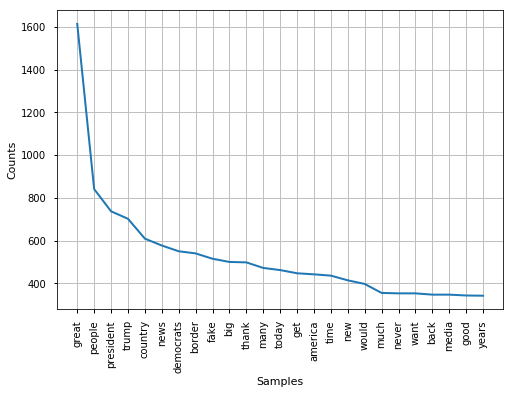

In [63]:
# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
from nltk import regexp_tokenize
column = 'clean_content_stop'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df_sampled[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])#df_sampled['clean_content_stop'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)

In [64]:
len(freq_tweets.keys())

10027

In [65]:
df_sampled['delta_price_class'].value_counts()

pos    3790
neg    3790
Name: delta_price_class, dtype: int64

In [66]:
# ' '.join(df_tokenize['content_stopped'])

In [67]:
TEXT['tokens']

['impt',
 'rep',
 'senators',
 'leadership',
 'mcconnell',
 'get',
 'healthcare',
 'plan',
 'approved',
 'yrs',
 'care',
 'disaster',
 'must',
 'happen',
 'sadly',
 'murder',
 'cases',
 'mexico',
 'rose',
 'big',
 'contributor',
 'humanitarian',
 'crisis',
 'taking',
 'place',
 'southern',
 'border',
 'spreading',
 'throughout',
 'country',
 'worse',
 'even',
 'afghanistan',
 'much',
 'caused',
 'drugs',
 'wall',
 'built',
 'congratulations',
 'senator',
 'orrin',
 'hatch',
 'absolutely',
 'incredible',
 'career',
 'tremendous',
 'supporter',
 'never',
 'forget',
 'beyond',
 'kind',
 'statements',
 'made',
 'president',
 'friend',
 'greatly',
 'missed',
 'senate',
 'thank',
 'mr',
 'president',
 'sacrifice',
 'hard',
 'work',
 'thoughtful',
 'leadership',
 'looking',
 'china',
 'open',
 'markets',
 'financial',
 'services',
 'also',
 'manufacturing',
 'farmers',
 'businesses',
 'industries',
 'without',
 'deal',
 'would',
 'unacceptable',
 'back',
 'home',
 'belong',
 'rockets',
 'fire

In [68]:
df_sampled['delta_time'].loc[df_sampled['delta_time']<'1 day']

date
2017-07-14 08:05:36   01:00:00
2019-01-31 17:43:21   01:00:00
2018-01-02 22:23:41   01:00:00
2019-03-26 03:24:10   01:00:00
2019-01-31 14:56:15   01:00:00
2019-01-24 13:34:26   01:00:00
2017-07-14 08:07:29   01:00:00
2018-04-26 01:41:03   01:00:00
2018-07-31 17:33:47   01:00:00
2017-12-02 17:14:13   01:00:00
2019-05-02 00:58:56   01:00:00
2017-07-25 10:21:41   01:00:00
2019-03-22 13:33:39   01:00:00
2018-11-29 22:47:59   01:00:00
2019-04-19 21:23:10   01:00:00
2018-09-15 20:57:48   01:00:00
2018-06-12 18:55:28   01:00:00
2018-07-07 22:24:02   01:00:00
2018-09-04 20:40:28   01:00:00
2019-02-26 01:50:37   01:00:00
2018-10-30 17:37:49   01:00:00
2019-05-02 00:57:48   01:00:00
2018-11-23 23:48:19   01:00:00
2018-08-04 19:47:40   01:00:00
2019-05-06 00:13:59   01:00:00
2017-11-12 00:16:05   01:00:00
2019-05-05 21:26:47   01:00:00
2019-03-08 18:47:33   01:00:00
2019-02-13 02:53:27   01:00:00
2018-10-18 19:43:32   01:00:00
2019-01-24 13:21:59   01:00:00
2018-08-17 01:49:11   01:00:00
201

In [69]:
i = np.random.choice(range(len(df_sampled)))
print(df_sampled['content'][i],'\n')
print(df_sampled['content_min_clean'][i],'\n')
print(df_sampled['clean_content'][i],'\n')
print(df_sampled['clean_content_stop'][i],'\n')
print(df_sampled['clean_content_stop_tokens'][i])

I allowed White House Counsel Don McGahn and all other requested members of the White House Staff to fully cooperate with the Special Counsel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion No Obstruction. Witch Hunt! 

I allowed White House Counsel Don McGahn and all other requested members of the White House Staff to fully cooperate with the Special Counsel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion No Obstruction. Witch Hunt! 

I allowed White House Counsel Don McGahn and all other requested members of the White House Staff to fully cooperate with the Special Counsel. In addition we readily gave over one million pages of documents. Most transparent in history. No Collusion No Obstruction. Witch Hunt! 

allowed white house counsel mcgahn requested members white house staff fully cooperate special counsel addition readily gave one million pages documents transpa

In [70]:
# column = 'clean_content'
# pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
# tweets_combined = df_sampled[column].values
# tweets_tokenized = regexp_tokenize(tweets_combined, pattern)
# tweets_tokens_combined = ' '.join(tweets_tokenized)
# # tweets_tokenized

In [71]:
# text_data = df_tokenize['content_min_clean']
# text_data = df_tokenize['content']
text_data = df_sampled['content_min_clean'].apply(lambda x: regexp_tokenize(x, pattern))


from gensim.models import Word2Vec
vector_size = 300

wv_keras = Word2Vec(text_data, size=vector_size, window=3, min_count=2, workers=3)
wv_keras.train(text_data,total_examples=wv_keras.corpus_count, epochs=10)

wv = wv_keras.wv
vocab_size = len(wv_keras.wv.vocab)
print(f'There are {vocab_size} words in the word2vec vocabulary, with a vector size {vector_size}.')

There are 7994 words in the word2vec vocabulary, with a vector size 300.


In [72]:
# save the vectors in a new matrix
word_model = wv_keras
vector_size = word_model.wv.vectors[1].shape[0]

embedding_matrix = np.zeros((len(word_model.wv.vocab) + 1, vector_size))
for i, vec in enumerate(word_model.wv.vectors):
  embedding_matrix[i] = vec
embedding_matrix.shape

(7995, 300)

In [73]:
import pickle
filename = 'word2vec_model_twitter.pickle'

with open(filename, 'wb') as f:
    pickle.dump([word_model,vector_size,embedding_matrix],f)

In [74]:
# Get list of texts to be converted to sequences
# sentences_train =text_data # df_tokenize['tokens'].values
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=len(wv.vocab))
tokenizer.fit_on_texts(list(text_data)) #tokenizer.fit_on_texts(text_data)

word_index = tokenizer.index_word
reverse_index = {v:k for k,v in word_index.items()}
# word_index

In [75]:
# from functions_combined_BEST import train_test_val_split
def train_test_val_split(X,y,test_size=0.20,val_size=0.1):
    """Performs 2 successive train_test_splits to produce a training, testing, and validation dataset"""
    from sklearn.model_selection import train_test_split

    if val_size==0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        return X_train, X_test, y_train, y_test
    else:

        first_split_size = test_size + val_size
        second_split_size = val_size/(test_size + val_size)

        X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=first_split_size)

        X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=second_split_size)

        return X_train, X_test, X_val, y_train, y_test, y_val

In [76]:
# df_tokenize.head()
X_train.shape
print('bookmark james, X_train shape=', X_train.shape)

bookmark james, X_train shape= (6822, 2702)


In [77]:
# defining loss function to use
def my_rmse(y_true,y_pred):
    """RMSE calculation using keras.backend"""
    from keras import backend as kb
    sq_err = kb.square(y_pred - y_true)
    mse = kb.mean(sq_err,axis=-1)
    rmse =kb.sqrt(mse)
    return rmse

# CREATING CALLBACKS
from keras import callbacks
filepath = 'twitterBLP_model1_weights.ep{epoch:02d}-acc{acc:.2f}.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath=filepath, monitor='acc',mode='min',
                                       save_best_only=True, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='acc',mode='min',patience=1,min_delta=.001,verbose=1)
callbacks = [checkpoint]#,early_stop]

In [78]:
# text_data

In [79]:
# return integer-encoded sentences
from keras.preprocessing import text, sequence
X = tokenizer.texts_to_sequences(text_data)
X = sequence.pad_sequences(X)

y = [1 if x=='pos' else 0  for x in df_sampled['delta_price_class']]
# y
     # y = df_tokenize['stock_delta_class'].values
# reverse_index
X_train, X_test, y_train, y_test = train_test_val_split(X, y, test_size=0.1, val_size=0)

In [80]:
print(len(text_data))
print(X_train.shape)
X_train[0].shape

7580
(6822, 2702)


(2702,)

In [53]:
from keras import models, layers, optimizers, regularizers
vocab_size = len(wv_keras.wv.vocab)
model2 = models.Sequential()
# embedding_layer = wv.get_keras_embedding(train_embeddings=False)

model2.add(layers.Embedding(vocab_size+1,
                             vector_size,input_length=X_train.shape[1],
                             weights=[embedding_matrix],trainable=False)) 
#250          
model2.add(layers.LSTM(units=250, return_sequences=False))#return_sequences=False))#, kernel_regularizer=regularizers.l2(.01)))
# model2.add(layers.LSTM(units=50, return_sequences=False))#return_sequences=False))#, kernel_regularizer=regularizers.l2(.01)))

# model2.add(layers.GlobalMaxPooling1D())
# model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(units=50, activation='relu'))#, activation='tan' # activation='relu'))

model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])#,'val_acc'])#, callbacks=callbacks)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2702, 300)         2397900   
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               551000    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 2,961,501
Trainable params: 563,601
Non-trainable params: 2,397,900
_________________________________________________________________


In [54]:
clock = bs.Clock(verbose=0)
print('---'*40)
print('\tFITTING MODEL:')
print('---'*40,'\n')

clock.tic('starting keras .fit')

num_epochs = 4
history = model2.fit(X_train, y_train, epochs=num_epochs, verbose=True, validation_split=0.1,
                     callbacks=callbacks,batch_size=300)#, validation_data=(X_val))

clock.toc(f'completed {num_epochs} epochs')
print('\n')
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)

from sklearn.metrics import roc_auc_score, roc_curve, classification_report

loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print(f'Training Accuracy:{accuracy}')

loss, accuracy = model2.evaluate(X_test, y_test, verbose=True)
print(f'Testing Accuracy:{accuracy}\n')

y_hat_test = model2.predict_classes(X_test)
print('---'*40)
print('CLASSIFICATION REPORT:')
print('---'*40)

print(classification_report(y_test,y_hat_test))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_hat_test)

import bs_ds as bs

mpl.rcParams['figure.figsize'] = (8,4)
bs.plot_confusion_matrix(conf_mat,classes=['Stock Increase','Stock Decrease'])




------------------------------------------------------------------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------------------------------------------------------------------ 

Instructions for updating:
Use tf.cast instead.
Train on 6139 samples, validate on 683 samples
Epoch 1/4
1200/6139 [====>.........................] - ETA: 49:13 - loss: 0.7015 - acc: 0.4825

KeyboardInterrupt: 

In [330]:
# from functions_combined_BEST import plot

## Parameters to Search
- Data in: 
    - remove tweets with too long of a delta_time
-Keras Layers:
    - Dense back to 50

### Model Saving

In [331]:
model_json = model2.to_json()
with open("bestNLPmodel_best_stock_increase_.json","w") as json_file:
    json_file.write(model_json)

model2.save_weights('bestNLPmodel_best_stock_increase_.h5')
print("saved model to disk.")

saved model to disk.


# Merging Dataframes